In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cp /content/drive/MyDrive/CSVs/* ./

In [8]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.graphics.gofplots import qqplot

In [9]:
from pandas_datareader import data as pdr
from datetime import datetime

In [110]:
df = pd.read_csv('/content/Infosys_stock.csv')

In [111]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-01,666.299988,654.150024,660.950012,665.049988,2943390.0,615.497864
1,2019-01-02,674.000000,662.049988,666.000000,669.049988,7416655.0,619.199890
2,2019-01-03,677.000000,663.099976,672.000000,669.150024,6827249.0,619.292419
3,2019-01-04,673.900024,651.000000,671.750000,661.049988,7889310.0,611.795959
4,2019-01-07,673.599976,661.500000,665.000000,671.700012,8046340.0,621.652405


In [112]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
237,2019-12-24,736.950012,728.299988,736.950012,733.400024,2890759.0,708.218262
238,2019-12-26,734.549988,726.549988,732.000000,728.950012,3821806.0,703.921021
239,2019-12-27,737.500000,728.849976,729.750000,736.950012,3399094.0,711.646362
240,2019-12-30,737.950012,727.250000,736.099976,732.900024,5368416.0,707.735474
241,2019-12-31,737.750000,725.450012,729.700012,731.150024,6927885.0,706.045471


In [113]:
close = df['Close']
print(close)

0      665.049988
1      669.049988
2      669.150024
3      661.049988
4      671.700012
          ...    
237    733.400024
238    728.950012
239    736.950012
240    732.900024
241    731.150024
Name: Close, Length: 242, dtype: float64


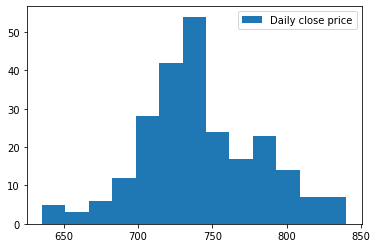

In [114]:
plt.hist(close,bins="rice",label="Daily close price")
plt.legend()
plt.show()

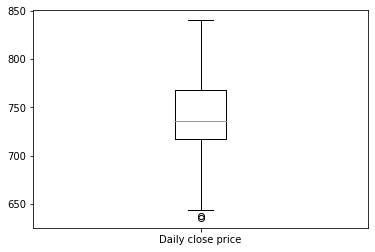

In [115]:
plt.boxplot(close,labels=["Daily close price"])
plt.show()

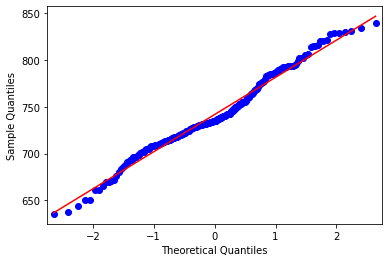

In [116]:
from statsmodels.graphics.gofplots import qqplot
qqplot(close, line='s')
plt.show()

In [117]:
print("Mean is: ", np.mean(close))
print("Standard deviation is: ", np.std(close))
print("Median is: ", np.quantile(close,0.5))

Mean is:  741.6966920963004
Standard deviation is:  39.803330825176275
Median is:  735.25


In [118]:
print("Skewness of the distribution is: ", stats.skew(close))

Skewness of the distribution is:  0.14654865376034995


In [119]:
print("Skewtest of the distribution is: ", stats.skewtest(close))

Skewtest of the distribution is:  SkewtestResult(statistic=0.9529865895310253, pvalue=0.3405968654250904)


In [120]:
print("Kurtosis of the distributionn is: ", stats.kurtosis(close))

Kurtosis of the distributionn is:  -0.004131304315328155


In [121]:
print("Kurtosis test of the distribution is: ", stats.kurtosistest(close))

Kurtosis test of the distribution is:  KurtosistestResult(statistic=0.20726778993420156, pvalue=0.8358007278302455)


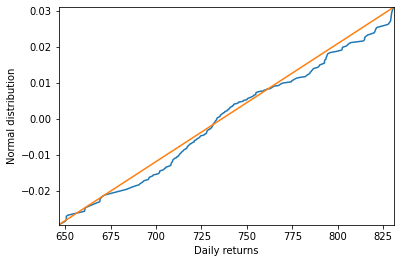

In [122]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(close,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

## Daily Return

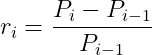

In [123]:
## Daily Return
returns = close.pct_change(1).dropna()
print(returns)

1      0.006015
2      0.000150
3     -0.012105
4      0.016111
5     -0.002456
         ...   
237   -0.003533
238   -0.006068
239    0.010975
240   -0.005496
241   -0.002388
Name: Close, Length: 241, dtype: float64


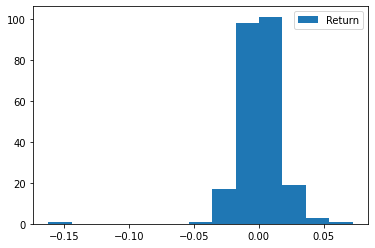

In [124]:
plt.hist(returns, bins="rice", label="Return")
plt.legend()
plt.show()

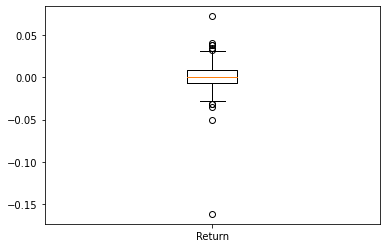

In [125]:
plt.boxplot(returns ,labels=["Return"])
plt.show()

In [126]:
print("Mean is: ", np.mean(returns))
print("Standard deviation is: ", np.std(returns))
print("Median is: ", np.quantile(returns,0.5))

Mean is:  0.0005538668323413111
Standard deviation is:  0.01757633313444526
Median is:  0.0004362697339963528


In [127]:
print("Skewness of the distribution is: ", stats.skew(returns))

Skewness of the distribution is:  -2.962167201183845


In [128]:
print("Skewtest of the distribution is: ", stats.skewtest(returns))

Skewtest of the distribution is:  SkewtestResult(statistic=-10.901639445896878, pvalue=1.1319903590046008e-27)


In [129]:
print("Kurtosis of the distributionn is: ", stats.kurtosis(returns))

Kurtosis of the distributionn is:  29.807322403988252


In [130]:
print("Kurtosis test of the distribution is: ", stats.kurtosistest(returns))

Kurtosis test of the distribution is:  KurtosistestResult(statistic=9.450027911947172, pvalue=3.387403602169322e-21)


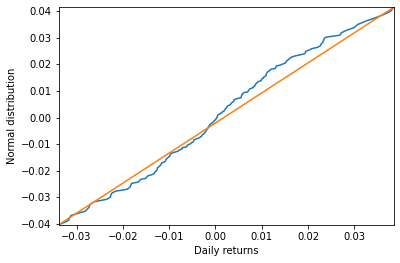

In [131]:
## Checking for normal distribution
t = np.linspace(0.01,0.99,1000)
q1 = np.quantile(returns,t)
q2 = stats.norm.ppf(t,loc=np.mean(returns),scale=np.std(returns))
plt.plot(q1,q2)
plt.plot([min(q1),max(q1)],[min(q2),max(q2)])
plt.xlim((min(q1),max(q1)))
plt.ylim((min(q2),max(q2)))
plt.xlabel("Daily returns")
plt.ylabel("Normal distribution")
plt.show()

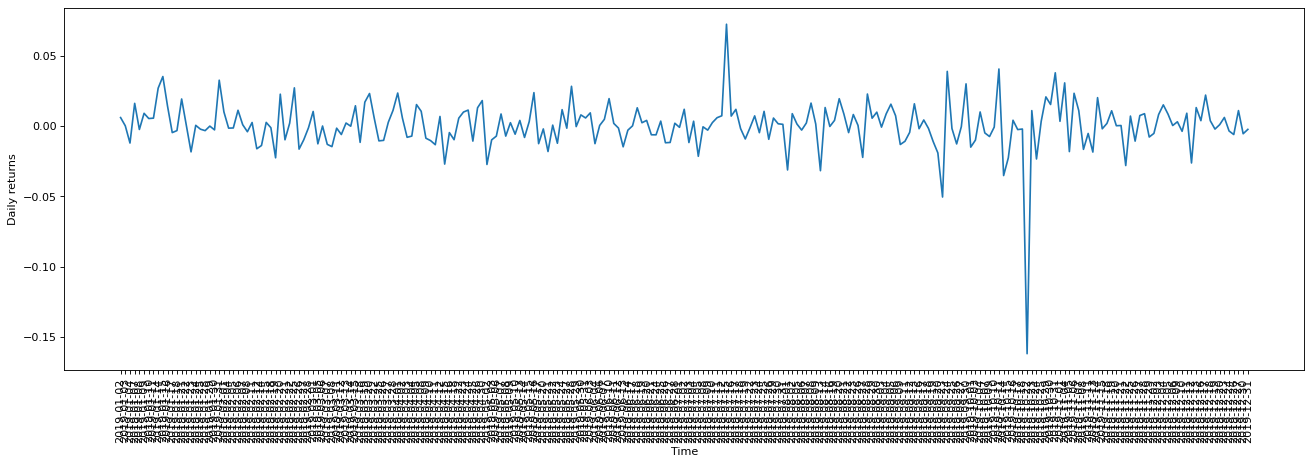

In [132]:
## Volatility of the distribution curve.
## Look at the original time series
plt.figure(figsize=(20, 6), dpi=80)
dates= df["Date"][1:]
data=[[i,j] for i,j in zip(dates,returns)]
plt.plot(dates,returns)
plt.xticks(rotation=90)
plt.xlabel("Time")
plt.ylabel("Daily returns")
plt.show()

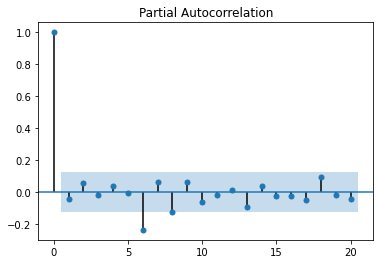

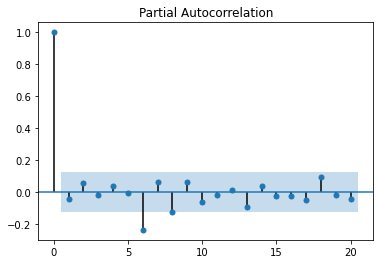

In [133]:
## Auto correlation function
plot_pacf(returns,lags=20)